# Exploration of Spotify API Data

In [1]:
# import modules
import prepare
import preprocessing

# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('playlist-offset-0-2700.csv', index_col=0)

In [3]:
df = prepare.handle_nulls(df)

In [4]:
df = df.dropna()

In [5]:
df = preprocessing.create_features(df)

In [6]:
df.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
0,tay-k,trapman,2020-07-12,trapman,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,...,4.0,True,43.0,1.0,232.803,3.880050,False,2020,07,12
1,lil wyte,doubt me now,2003-03-04,oxy cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,...,4.0,True,61.0,1.0,193.920,3.232000,False,2003,03,04
2,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,...,4.0,True,22.0,1.0,254.390,4.239833,False,2019,11,29
3,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,...,4.0,True,62.0,1.0,250.493,4.174883,True,2010,10,01
4,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,...,4.0,True,45.0,1.0,261.933,4.365550,True,2001,02,13


In [7]:
train, validate, test = preprocessing.split_df(df)

train shape:  (1964, 26) , validate shape:  (555, 26) , test shape:  (280, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [8]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
2101,luniz,luniz - the lost tapes 2,2009-03-03,i got 5 on it,1rS31P08Cn64Rn7pnMh5S5,0.631,0.687,10.0,-7.870,0.0,...,4.0,True,0.0,1.0,245.693,4.094883,False,2009,03,03
970,reason,new beginnings,2020-10-09,extinct,70hDklZStSazrExPjHJPfR,0.630,0.694,2.0,-6.593,1.0,...,4.0,True,58.0,1.0,222.249,3.704150,False,2020,10,09
2028,hardo,trapnese,2016-11-25,who ya gang,5UShjdfool3o6TOMi2PeJR,0.924,0.645,10.0,-4.119,0.0,...,4.0,True,28.0,1.0,237.051,3.950850,False,2016,11,25
1727,yella beezy,baccend beezy,2019-07-19,restroom occupied (feat. chris brown),0l9QUT8anYlBo4yD3PXfPM,0.711,0.683,6.0,-5.039,1.0,...,4.0,True,60.0,1.0,216.483,3.608050,True,2019,07,19
1976,migos,culture,2017-01-27,t-shirt,7KOlJ92bu51cltsD9KU5I7,0.865,0.687,10.0,-3.744,0.0,...,4.0,True,68.0,1.0,242.407,4.040117,False,2017,01,27


## Visualizing Release Date vs. Popularity

In [9]:
# sorting by oldest year first, keeps original index
train_sort_date = train.sort_values(by=['release_date'])

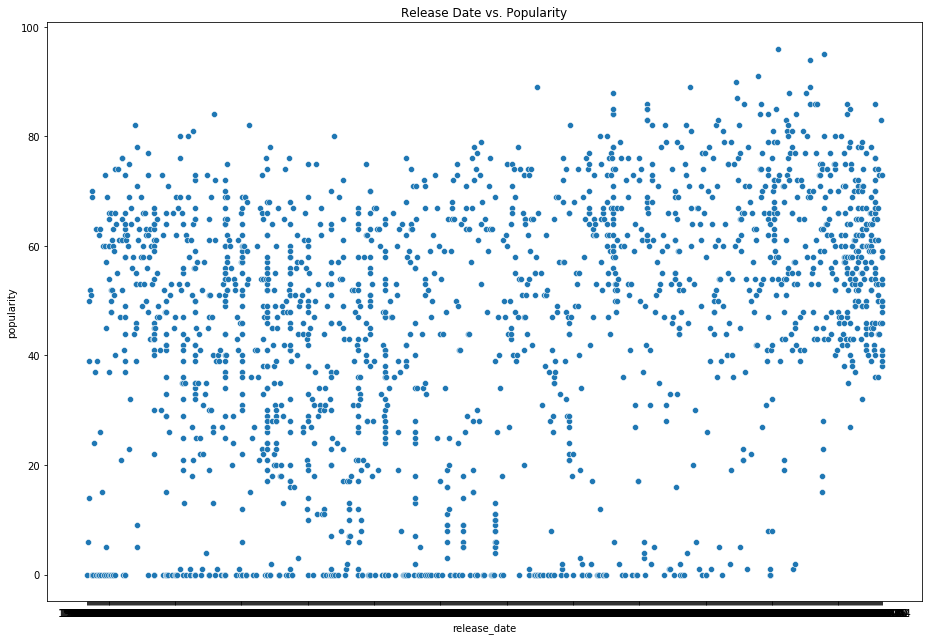

In [10]:
plt.figure(figsize=(13,9))

sns.scatterplot(x=train_sort_date.release_date, y=train_sort_date.popularity)
plt.title('Release Date vs. Popularity')

plt.tight_layout()

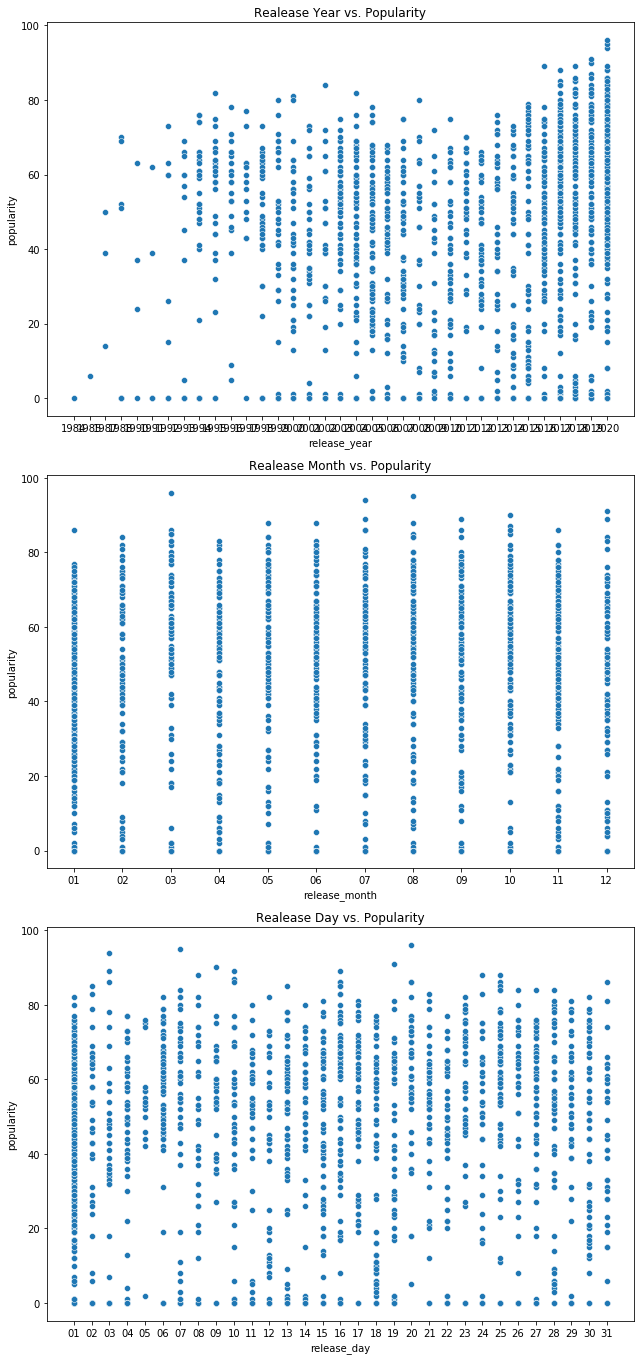

In [11]:
plt.figure(figsize=(9,19))

plt.subplot(3,1,1)

# sorting by oldest year first, keeps original index
train_sort_year = train.sort_values(by=['release_year'])
sns.scatterplot(x=train_sort_year.release_year, y=train_sort_year.popularity)
plt.title('Realease Year vs. Popularity')

plt.subplot(3,1,2)
# sorting by lowest month first, keeps original index
train_sort_month = train.sort_values(by=['release_month'])
sns.scatterplot(x=train_sort_month.release_month, y=train_sort_month.popularity)
plt.title('Realease Month vs. Popularity')

plt.subplot(3,1,3)
# sorting by lowest day first, keeps original index
train_sort_day = train.sort_values(by=['release_day'])
sns.scatterplot(x=train_sort_day.release_day, y=train_sort_day.popularity)
plt.title('Realease Day vs. Popularity')

plt.tight_layout()

It appears a song release year influences popularity more than the specific day or month. Songs released recently visually look to be more popular than older songs. 
- Will statistical testing reflect this? 
- Would binning the release year help to visualize this (though will cost granularity)?

In [12]:
# will bin popularity by 5 equal parts
train['popularity_bins'] = pd.qcut(train.popularity, 5)

In [13]:
# the values from binning
pd.qcut(train.popularity, 5).value_counts()

(55.0, 66.0]      421
(21.6, 44.0]      402
(-0.001, 21.6]    393
(44.0, 55.0]      387
(66.0, 96.0]      361
Name: popularity, dtype: int64

5 equal-ish bins from popularity in order (note: no songs from train reach 100)
- (-0.001, 21.6]
- (21.6, 44.0]
- (44.0, 55.0]
- (55.0, 66.0]
- (66.0, 96.0]

In [14]:
train['release_year'] = train.release_year.astype('int')

Next, will create bins for year release date

In [23]:
# will bin release_year by 6 equal parts
train['release_year_bins'] = pd.qcut(train.release_year, 6, duplicates='drop', labels=['1984_2002','2003_2007','2008_2015','2016_2017','2018_2020'])

pandas qcut duplicates parameter
- duplicates{default ‘raise’, ‘drop’}, optional
- If bin edges are not unique, raise ValueError or drop non-uniques.

In [20]:
# the values from binning
pd.qcut(train.release_year, 6, duplicates='drop').value_counts()

(2017.0, 2020.0]      637
(2007.0, 2015.0]      381
(2002.0, 2007.0]      339
(1983.999, 2002.0]    334
(2015.0, 2017.0]      273
Name: release_year, dtype: int64

Next, will visualize the interaction of year with popularity using the binned features

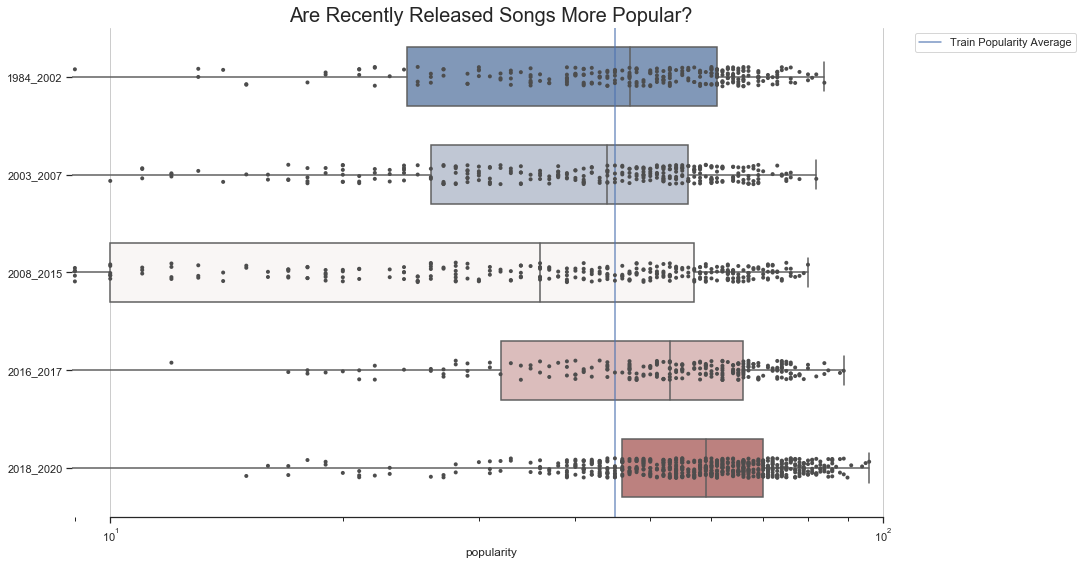

In [38]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="release_year_bins", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), alpha=.75, label='Train Popularity Average')

plt.title('Are Recently Released Songs More Popular?', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="release_year_bins", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Next step: 
- bin by decade instead?
- statistically test unbinned feature and highest popular binned category